# WeRateGods Project- Data Wrangling, Visualization, Twitter API

### Janurary 27, 2018
#### By: Beltino Goncalves 


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plot
import ggplot
import requests
import time
import datetime
import os
import json
import tweepy
import re 

C:\Users\Alex-PC\Anaconda2\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Alex-PC\Anaconda2\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Alex-PC\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Gathering Data

- The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens 

In [2]:
# Download this file manually by clicking the following link: twitter_archive_enhanced.csv

twit_archive=pd.read_csv('twitter-archive-enhanced.csv')
twit_archive.head()
#twit_archive.set_index('tweet_id', inplace=True)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as fl:
    fl.write(response.content)

# Open Images
images= pd.read_csv('image-predictions.tsv', sep='\t')

images.head()
#images.set_index('tweet_id', inplace=True)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
consumer_key = 'E6SprsWOwMXcJw9RgpIrUM5gI'
consumer_secret = 'ZS90UNEFYxPR2fv5xJ7Zm1KGNcGfZHYY9vZSEVmNZR1k2GTMUv'
access_token = '948944999563096065-5z6X5u3YR1TcezMMnnaqI4GUxvsrcpB'
access_secret = 'kuLSwlUy8IrtAzvAsYP40ESVgLPWtIt2ZmjSTZTNxriQM'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [5]:
try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print 'Error! Failed to get request token.'

In [6]:
tweet_ids = list(twit_archive.tweet_id)
start = time.time()
tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, 
                                      wait_on_rate_limit=True,
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print str(tweet)
end = time.time()
print end - start

888202515573088257
873697596434513921
869988702071779329
866816280283807744
861769973181624320
842892208864923648
827228250799742977
802247111496568832
775096608509886464
Rate limit reached. Sleeping for: 698
Rate limit reached. Sleeping for: 702
1927.28600001


In [7]:
with open('tweet_json.txt', 'w') as fs:  
    json.dump(tweet_data, fs)

In [8]:
tweet_json = pd.read_json('tweet_json.txt',orient='index')

## Assessing Data 
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [9]:
twit_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [10]:
twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twit_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#Cheking for Duplicates 
twit_archive[twit_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
twit_archive.name.value_counts()
twit_archive['name'].sample(5)

2245       Stu
489     Chubbs
577       None
2022     Gizmo
2253      None
Name: name, dtype: object

There are no duplicates in `archived` table.

In [14]:
twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [17]:
#images['jpg_url'].value_counts()

In [18]:
images[images['jpg_url'] == 'https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True


In [19]:
images['p1'].value_counts()
images[images['p1']=="cocker_spaniel" ].sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True


In [20]:
tweet_json.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,2527,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,518,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,126,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,304,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,143,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,108,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{u'follow_request_sent': False, u'has_extended..."


In [21]:
#tweet_json.info()
#tweet_json['id'].value_counts()

In [22]:
tweet_json['id'].sample(10)

1991-12-04 04:18:53.922455552    691820333922455552
1992-06-01 15:18:54.438625280    707411934438625280
1991-06-09 12:30:39.084101634    676470639084101632
1995-08-15 15:46:19.447930884    808501579447930880
1991-09-11 05:39:03.613382656    684567543613382656
1997-04-17 14:48:51.465048066    861288531465048064
1991-11-03 07:45:15.265683456    689154315265683456
1992-08-19 19:13:06.676113411    714251586676113408
1991-06-19 12:49:05.548390400    677335745548390400
1993-10-25 21:17:27.268179968    751583847268179968
Name: id, dtype: int64

## Quality Issue
`Accuracy, Completeness, Consistency, Validity --> Poor Content Issue`

###### `Archived` Dataset
- `timestamp` column will be convert from objective to datetime. 
- The name of the dogs in name columns are as none,as,a,the,not etc (May have to recollect dog names).
- Remove unnecessary columns including:`in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,rating_numerator, rating_denominator` columns and  181 retweeted records. 
- `source` column can be cleaned, and identify user source of twitter access. 
- Scrape the Gender off `text` column based on words of: he or she, his or hers, him or her etc. 
- Convert non-null objects to none types
- Parse the ratings and take out outliers. 

###### `Images` Dataset
-  There are same jpg_url with different `tweet_id`.
-  Remove duplicates `jpg_url`.

###### `Tweet_JSON` Dataset 
- Rename the `id` column to `tweet_id` for joinning tables.
- Remove unwanted columns, re-structure column order and index 


##  Tidiness Issues
`untidy data` --> structual issues
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

###### `Archived` Dataset
- Drop columns that are not needed, and rearrange format.
- Ratings column needs to be converted to float.
- datetime objects needs to be converted to datetime objects.
- parse the date time table in two different columns.

###### `Images` Dataset
- Convert `id` column into a string. 
- Drop all tables but tweet_id, retweet count, favorite count, text.

###### `All Tables`
- join all tables at an inner join between all three tables. 


## Add Changes
- Fix the data types for other fields besides timestamp. For example all IDs should be strings, not ints, because we are not going to perform mathematical operations over them, those are labels or identifiers.

- Also take a look at the numerator - in the source data there seems to be fractional numerators. Are those preserved when exporting the data? Take a look at the id = 681340665377193000

## Clean Data
- Third phase of the wrangling data. This is where you fix quality and tidiness issues that were defined above. 

In [23]:
twit_archive_clean=twit_archive.copy()
images_clean=images.copy()
tweet_json_clean=tweet_json.copy()

### twit_archive_clean 

#### Define
- Timestamp column will be converted from objective to datetime objects and parsed into seperate columns as date and time.


In [24]:
twit_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [25]:
## Converting DateTime objects from string to datetime object:
twit_archive_clean['timestamp']=pd.to_datetime(twit_archive_clean['timestamp']).sort_values()

#Parsing datetime into date column as date and time. 
twit_archive_clean['date']=twit_archive_clean['timestamp'].apply(lambda x: x.strftime('%m-%d-%Y')).sort_values()
twit_archive_clean['time']=twit_archive_clean['timestamp'].apply(lambda x: x.strftime('%H:%M')).sort_values()
twit_archive_clean['Weekday']=twit_archive_clean['timestamp'].apply(lambda x: x.strftime('%A')) 

# Changing the dtypes for date and time 
twit_archive_clean['date']=pd.to_datetime(twit_archive_clean.date,format='%m-%d-%Y')
#twit_archive_clean['time']=pd.to_datetime(twit_archive_clean.time,format='%H:%M')

#partsing 

# Seeting Weekday data type
twit_archive_clean['Weekday']=pd.Categorical(twit_archive_clean['Weekday'], categories=['Monday','Tuesday'
                                                        ,'Wednesday','Thursday',
                                                        'Friday','Saturday', 'Sunday'], ordered=True)

In [26]:
twit_archive_clean['Weekday'].sample()
twit_archive_clean['date'].sample()
twit_archive_clean['time']

0       16:23
1       00:17
2       00:18
3       15:58
4       16:00
5       00:08
6       16:27
7       00:22
8       16:25
9       15:59
10      00:31
11      16:11
12      01:55
13      00:10
14      17:02
15      00:19
16      00:22
17      16:56
18      00:23
19      01:02
20      16:49
21      16:06
22      03:39
23      00:47
24      16:08
25      00:07
26      16:17
27      23:58
28      20:14
29      23:25
        ...  
2326    00:24
2327    00:06
2328    23:23
2329    21:54
2330    21:10
2331    20:32
2332    20:01
2333    19:31
2334    16:37
2335    16:11
2336    15:14
2337    14:57
2338    04:02
2339    03:55
2340    03:44
2341    03:22
2342    02:38
2343    01:59
2344    01:52
2345    01:22
2346    01:01
2347    00:55
2348    00:49
2349    00:35
2350    00:30
2351    00:24
2352    00:04
2353    23:21
2354    23:05
2355    22:32
Name: time, Length: 2356, dtype: object

#### Test

In [27]:
type(twit_archive_clean['date'].iloc[0])
type(twit_archive_clean['time'].iloc[0])
type(twit_archive_clean['Weekday'].iloc[0])

str

In [28]:
twit_archive_clean['timestamp']
twit_archive_clean['date']
twit_archive_clean['time']
twit_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,Weekday
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23,Tuesday
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17,Tuesday


#### Define
The name of the dogs in name column are as none,as,a,the,not etc (May have to recollect dog names). We have two options: either clear dog names of an, the, a, none etc. or parse thru the text column to identify the dog's name. 

In [29]:
twit_archive_clean['name'].value_counts()
twit_archive_clean['text'].sample(5)

459     This is Buddy. He ran into a glass door once. ...
2141    This is Zoey. Her dreams of becoming a hippo b...
794     RT @dog_rates: Meet Fizz. She thinks love is a...
2002    Say hello to Jazz. She should be on the cover ...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object

In [30]:
twit_archive_clean['text'].str.split().sample(2)

1672    [Meet, Brody., He's, a, Downton, Abbey, Falset...
605     [RT, @dog_rates:, Not, familiar, with, this, b...
Name: text, dtype: object

In [31]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                    

In [32]:
Names =[]

#Strip_text=twit_archive_clean['text'].str.split()
for text in twit_archive_clean['text']:
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        Names.append(text.split()[2].strip(',').strip('.'))
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        Names.append(text.split()[1].strip(',').strip('.'))
    elif text.startswith('Here is ') and re.match(r'[A-Z].*', text.split()[2]):
        Names.append(text.split()[2].strip(',').strip('.'))
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        Names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        Names.append(text.split()[3].strip(',').strip('.'))
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        Names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    else:
        Names.append('Dogwithnoname')
# dogwithnoname was inspired by the song America - a Horse with no Name.. :)         
twit_archive_clean['Names'] = Names

In [33]:
twit_archive_clean[twit_archive_clean.Names == 'Dogwithnoname'].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,Weekday,Names
319,834477809192075265,NaN,NaN,2017-02-22 18:59:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leo. He was a skater pu...,8.295020e+17,4.196984e+09,2017-02-09 01:27:41 +0000,https://twitter.com/dog_rates/status/829501995...,...,10,Leo,None,None,None,None,2017-02-22,18:59,Wednesday,Dogwithnoname


#### Test

In [34]:
#twit_archive_clean[twit_archive_clean['Name']=='George']
print twit_archive_clean['Names'].value_counts().head(10)

Dogwithnoname    942
Charlie           11
Lucy              11
Cooper            10
Oliver            10
Tucker             9
Penny              9
Lola               8
Sadie              8
Winston            8
Name: Names, dtype: int64



#### Define
Remove unnecessary columns including:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,rating_numerator, rating_denominator columns and 181 retweeted records

In [35]:
# Removing unwanted columns from twit_archive_clean 
twit_archive_clean= twit_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                             'retweeted_status_id',
                                             'retweeted_status_user_id',
                        'retweeted_status_timestamp','name'], axis=1)

#### Test

In [36]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
date                  2356 non-null datetime64[ns]
time                  2356 non-null object
Weekday               2356 non-null category
Names                 2356 non-null object
dtypes: category(1), datetime64[ns](2), int64(3), object(9)
memory usage: 260.4+ KB


#### Define
source column can be cleaned, and identify user source of access.

In [37]:
twit_archive_clean['source'].value_counts()
twit_archive_clean['source']=twit_archive_clean['source'].apply(lambda x: re.findall(r'>(.*?)<', x)[0])

#### Test

In [38]:
twit_archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define 
Dogs gender based on `text` column of: he or she, his or hers, him or her etc.

In [39]:
twit_archive_clean['text'].sample(10)
male = ["He's","he's",'he','He','His','his','boy','guy','male','him','male']
female = ["Her's","her's",'Her','her','hers','She',"She's",'she',"she's","gal's",'herself','female']
#Strip_text=twit_archive_clean['text'].str.split()
dog_gender = []
for text in twit_archive_clean['text']:
    # If Male
    if any(map(lambda x:x in male, text.split())):
        dog_gender.append('Male')
    # If Female
    elif any(map(lambda x:x in female, text.split())):
        dog_gender.append('Female')
    # If group or Multiple or Not specified
    else:
        dog_gender.append('Unknown')
# appened list on dataframe
twit_archive_clean['dog_gender'] = dog_gender

#### Test

In [40]:
twit_archive_clean[twit_archive_clean['dog_gender']== "Unknown"]['text'].sample(15)

2054    Striped dog here. Having fun playing on back. ...
281     RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...
1046    Say hello to Bentley and Millie. They do every...
2099    *screams for a little bit and then crumples to...
934     Here we are witnessing an isolated squad of bo...
1667    Meet Joey and Izzy. Joey only has one ear that...
2239    This dog resembles a baked potato. Bed looks u...
391     Here's a little more info on Dew, your favorit...
55      @roushfenway These are good dogs but 17/10 is ...
1545    Someone sent me this without any context and e...
2208    This is Maks. Maks just noticed something wasn...
1534    Here we are witnessing a rare High Stepping Al...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1737    Guys this really needs to stop. We've been ove...
1132    When you're way too slow for the "down low" po...
Name: text, dtype: object

In [41]:
twit_archive_clean.dog_gender.value_counts()

Male       1147
Unknown     829
Female      380
Name: dog_gender, dtype: int64

In [42]:
twit_archive_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,date,time,Weekday,Names,dog_gender
513,811647686436880384,2016-12-21 19:01:02,Twitter for iPhone,PUPDATE: I've been informed that Augie was act...,NaN,11,10,None,None,None,None,2016-12-21,19:01,Wednesday,Dogwithnoname,Male
1181,719332531645071360,2016-04-11 01:13:34,Twitter for iPhone,This is Pippa. She managed to start the car bu...,https://twitter.com/dog_rates/status/719332531...,11,10,None,None,None,None,2016-04-11,01:13,Monday,Pippa,Female


#### Define 
Parse the ratings, add count of dogs and take out outliers.

In [43]:
ratings = []
extract_ratings = lambda x: ratings.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))
twit_archive_clean['text'].apply(extract_ratings)

numm = []
dog_count = []

for rate in ratings:
    if len(rate) == 0:
        numm.append('0.0')
        dog_count.append(1)
    elif len(rate) == 1 and rate[0][-1] == '10':
        numm.append(float(rate[0][0]))
        dog_count.append(1)
    elif len(rate) == 1: 
        avg = float(rate[0][0]) / (float(rate[0][-1]) / 10) 
        numm.append(avg)
        dog_count.append(float(rate[0][-1]) / 10)
    elif len(rate) > 1: 
        total = 0
        list = []
        for i in range(len(rate)):
            if rate[i][-1] == '10': 
                list.append(rate[i])
        for rate in list:
            total = total + float(rate[0])
        avg = total / len(rate)
        numm.append(avg)
        dog_count.append(len(rate))
    else:
        numm.append('Not parsed')
        dog_count.append('Not parsed') 

#### Test

In [44]:
twit_archive_clean['rating'] = numm 
twit_archive_clean['dog_count'] = dog_count
twit_archive_clean['rating'].value_counts()

12.0      560
11.0      466
10.0      451
13.0      351
9.0       157
8.0        99
14.0       56
7.0        53
5.0        35
6.0        32
3.0        19
4.0        15
2.0        10
1.0         8
4.75        4
4.25        4
3.25        3
0.0         3
3.75        3
9.75        2
5.25        2
3.5         2
15.0        2
0.0         2
420.0       2
5.75        2
2.75        2
7.5         1
1776.0      1
11.26       1
4.5         1
9.5         1
7.25        1
2.25        1
666.0       1
182.0       1
11.27       1
13.5        1
Name: rating, dtype: int64

### Images_clean DF

#### Define 
Drop NAN in `jpg_url` columns 

In [45]:
images_clean= images_clean.dropna(subset = ['jpg_url'])

#### Test

In [46]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


### Tweet_JSON DF

#### Define 
Rename the id column to tweet_id for joinning tables.

In [47]:
tweet_json_clean=tweet_json_clean.rename(columns={'id':'tweet_id'})

#### Test

In [48]:
tweet_json_clean.head(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,2527,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,518,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,126,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,304,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,143,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{u'follow_request_sent': False, u'has_extended..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,108,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{u'follow_request_sent': False, u'has_extended..."


In [49]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2347 non-null datetime64[ns]
entities                         2347 non-null object
extended_entities                1825 non-null object
favorite_count                   2347 non-null int64
favorited                        2347 non-null int64
geo                              0 non-null float64
tweet_id                         2347 non-null int64
id_str                           2347 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

#### Define 
Remove unwanted columns, re-structure column order and index.

In [50]:
tweet_json_clean=tweet_json_clean.drop(['contributors','coordinates','created_at','geo','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str',
                'in_reply_to_user_id','in_reply_to_user_id_str','lang','place','possibly_sensitive','possibly_sensitive_appealable',
                'quoted_status','quoted_status_id','quoted_status_id_str','favorited','retweeted_status','source','truncated','user','entities','extended_entities','id_str','is_quote_status','retweeted'],axis=1)
#tweet_json_clean=tweet_json_clean.drop(['is_quote_status','retweeted'],axis=1)

In [51]:
tweet_json_clean=tweet_json_clean[['tweet_id','favorite_count','retweet_count']]

#### Test

In [52]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 3 columns):
tweet_id          2347 non-null int64
favorite_count    2347 non-null int64
retweet_count     2347 non-null int64
dtypes: int64(3)
memory usage: 73.3 KB


### Tidiness 

#### Joining all dataframe

In [53]:
df1=twit_archive_clean.merge(tweet_json_clean, on='tweet_id', how='left')

### Test

In [54]:
df1.info()
df1['favorite_count']=df1['favorite_count'].fillna(0)
df1['retweet_count']=df1['retweet_count'].fillna(0)
df1['favorite_count'].value_counts()

df1[df1['favorite_count']== 0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
date                  2356 non-null datetime64[ns]
time                  2356 non-null object
Weekday               2356 non-null category
Names                 2356 non-null object
dog_gender            2356 non-null object
rating                2356 non-null object
dog_count             2356 non-null float64
favorite_count        1514 non-null float64
retweet_count         1514 non-null float64
dtypes: categor

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,date,time,Weekday,Names,dog_gender,rating,dog_count,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,2017-08-01,16:23,Tuesday,Phineas,Male,13,1.0,0.0,0.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None,2017-08-01,00:17,Tuesday,Tilly,Female,13,1.0,0.0,0.0
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,None,None,None,None,2017-07-28,16:27,Friday,Jax,Male,13,1.0,0.0,0.0
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,doggo,None,None,None,2017-07-26,15:59,Wednesday,Cassie,Female,14,1.0,0.0,0.0
11,889880896479866881,2017-07-25 16:11:53,Twitter for iPhone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,None,None,None,None,2017-07-25,16:11,Tuesday,Bruno,Male,13,1.0,0.0,0.0
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,puppo,2017-07-25,01:55,Tuesday,Dogwithnoname,Unknown,13,1.0,0.0,0.0
14,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,None,None,None,puppo,2017-07-24,17:02,Monday,Stuart,Male,13,1.0,0.0,0.0
17,888804989199671297,2017-07-22 16:56:37,Twitter for iPhone,This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13,10,None,None,None,None,2017-07-22,16:56,Saturday,Zeke,Male,13,1.0,0.0,0.0
19,888202515573088257,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13,10,None,None,None,None,2017-07-21,01:02,Friday,Dogwithnoname,Female,13,1.0,0.0,0.0
23,887473957103951883,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,13,10,None,None,None,None,2017-07-19,00:47,Wednesday,Canela,Female,13,1.0,0.0,0.0


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
date                  2356 non-null datetime64[ns]
time                  2356 non-null object
Weekday               2356 non-null category
Names                 2356 non-null object
dog_gender            2356 non-null object
rating                2356 non-null object
dog_count             2356 non-null float64
favorite_count        2356 non-null float64
retweet_count         2356 non-null float64
dtypes: categor

#### Joining with images table

In [56]:
tweet_df=images_clean.merge(df1, on='tweet_id', how='inner')

In [57]:
tweet_df.sample()
#tweet_df.favorite_count.value_counts()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,puppo,date,time,Weekday,Names,dog_gender,rating,dog_count,favorite_count,retweet_count
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,...,None,2015-12-27,23:53,Sunday,Panda,Male,9,1.0,0.0,0.0


#### Define
 Columns needed to be converted to the correct datatypes and drop unwanted tables.

In [58]:
tweet_df['tweet_id'] = tweet_df['tweet_id'].astype(str)
tweet_df['favorite_count'] = tweet_df['favorite_count'].astype(int)
tweet_df['retweet_count'] = tweet_df['retweet_count'].astype(int)


#### Test

In [59]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 31 columns):
tweet_id              2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-

#### Define 
The `p1_dog , p2_dog , p3_dog` needs to be one single variable. 

In [60]:
cl=[]
predicted_breed=[]
def get_confidence(row):
    if row['p1_dog'] == True:
        cl.append(row['p1_conf'])
        predicted_breed.append(row['p1'])
    elif row['p2_dog'] == True:
        predicted_breed.append(row['p2'])
        cl.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        predicted_breed.append(row['p3'])
        cl.append(row['p3_conf'])
    else:
        predicted_breed.append('NaN')
        cl.append(0)
tweet_df.apply(get_confidence, axis=1)
tweet_df['Breed'] = predicted_breed
tweet_df['Confidence_level'] = cl

# Drop Unwatee

#### Test

In [61]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 33 columns):
tweet_id              2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-

#### Define

Use the reshape function to restructure `dogoo,floofer,pupper,puppo` columns

In [62]:
d={'dog_stage':['doggo','floofer','pupper','puppo']}
ft1=pd.lreshape(tweet_df,d) 
tweet_df=ft1.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

In [63]:
tweet_df['Breed'].value_counts()
tweet_df['dog_stage'].value_counts()

None       1754
pupper      222
doggo        67
puppo        24
floofer       8
Name: dog_stage, dtype: int64

#### Define
Set the order of columns

In [64]:
tweet_df.columns.tolist()
tweet_df1=tweet_df[['tweet_id','Names','dog_gender','timestamp','date','time','source',
          'text','jpg_url','img_num','favorite_count',
          'retweet_count','dog_count','rating','dog_stage','Breed','Confidence_level',"Weekday"]]
tweet_df1.head()
tweet_df1[tweet_df1['dog_stage']== 'doggo'].sample()

,tweet_id,Names,dog_gender,timestamp,date,time,source,text,jpg_url,img_num,favorite_count,retweet_count,dog_count,rating,dog_stage,Breed,Confidence_level,Weekday
1442,775364825476165632,Finley,Male,2016-09-12 16:05:54,2016-09-12,16:05,Twitter for iPhone,This is Finley. He's an independent doggo stil...,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,8183,3393,1.0,11,doggo,beagle,0.571229,Monday


In [65]:
tweet_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 1991 to 7706
Data columns (total 18 columns):
tweet_id            2075 non-null object
Names               2075 non-null object
dog_gender          2075 non-null object
timestamp           2075 non-null datetime64[ns]
date                2075 non-null datetime64[ns]
time                2075 non-null object
source              2075 non-null object
text                2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
favorite_count      2075 non-null int32
retweet_count       2075 non-null int32
dog_count           2075 non-null float64
rating              2075 non-null object
dog_stage           2075 non-null object
Breed               2075 non-null object
Confidence_level    2075 non-null float64
Weekday             2075 non-null object
dtypes: datetime64[ns](2), float64(2), int32(2), int64(1), object(11)
memory usage: 291.8+ KB


# Storing, Analyzing, and Visualizing Data
Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv`. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your `wrangle_act.ipynb` Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [66]:
folder_name = 'Documents'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Storing files
tweet_df1.to_csv('Documents/twitter_archive_master.csv')
twit_archive_clean.to_csv('Documents/twit_archive_clean.csv')
tweet_json_clean.to_csv('Documents/tweet_json_clean.csv')
images_clean.to_csv('Documents/images_clean.csv')

#  Analyzing

In [67]:
df=pd.read_csv('Documents/twitter_archive_master.csv', encoding = 'utf-8')

In [68]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df.tweet_id = df.tweet_id.astype(str)
df.timestamp = df.timestamp.astype('datetime64[ns]')
df.date = df.date.astype('datetime64[ns]')

### Descriptive Statistics


In [69]:
df.describe()

,img_num,favorite_count,retweet_count,dog_count,rating,Confidence_level
count,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000
mean,1.203855,5231.546988,1768.289157,1.085301,11.591460,0.463269
std,0.561875,9967.188719,3725.023263,0.781260,39.846143,0.339216
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,10.000000,0.139761
50%,1.000000,1380.000000,555.000000,1.000000,11.000000,0.457117
75%,1.000000,5536.500000,1946.500000,1.000000,12.000000,0.772790
max,4.000000,123834.000000,61859.000000,17.000000,1776.000000,0.999956


### Question I would like to answer: 
1. What breed are most likely to be favorite or retweeted?  
  a. State the Min, Mean, Max

2. What are the most common names based on breed. 

3. Bread's gender based on population 


### Assumptions:
It is difficult to say how accurate the confidence interval of the predictor is. Assuming that Breed identified from given dataset is accurate, grouping the breed dogs will be left of as is.   

#### Define
1. What breed are most likely to be favorite or retweeted?  
  a. State the Min, Mean, Max.

In [70]:
df['Breed'].value_counts().sample(15)

toy_terrier                     3
Border_collie                  12
kuvasz                         19
malamute                       34
German_short-haired_pointer     8
Norfolk_terrier                 7
Border_terrier                  7
Rottweiler                     19
German_shepherd                21
kelpie                         13
Ibizan_hound                    5
Pomeranian                     42
Mexican_hairless                7
toy_poodle                     52
malinois                       11
Name: Breed, dtype: int64

In [71]:
# Retweeted grouped by Breed
Zero_min_rt=df.groupby(['Breed'])['retweet_count'].min().sort_values()
Zero_min_rt[Zero_min_rt == 0].count()
df.groupby(['Breed'])['retweet_count'].mean().sort_values()
df.groupby(['Breed'])['retweet_count'].max().sort_values()
df.groupby(['Breed'])['retweet_count'].sum().sort_values().tail(5)


#Favorite grouped by Breed
# zero_min_ft=df.groupby(['Breed'])['favorite_count'].min().sort_values()
# zero_min_ft[zero_min_ft > 0].count()
# df.groupby(['Breed'])['favorite_count'].mean().sort_values().tail()
# df.groupby(['Breed'])['favorite_count'].max().sort_values().tail()
# df.groupby(['Breed'])['favorite_count'].sum().sort_values().tail()

Breed
French_bulldog         92391
Chihuahua             185598
Pembroke              208306
Labrador_retriever    261388
golden_retriever      485458
Name: retweet_count, dtype: int64

#### Test

In [72]:
df[(df['Breed']== 'wire-haired_fox_terrier') & (df['retweet_count']> 0)]
df[(df['Breed']== 'standard_poodle') & (df['retweet_count']> 0)]
df[(df['Breed']== 'Chihuahua') & (df['retweet_count']> 5000)]

,tweet_id,Names,dog_gender,timestamp,date,time,source,text,jpg_url,img_num,favorite_count,retweet_count,dog_count,rating,dog_stage,Breed,Confidence_level,Weekday
76,886983233522544640,Maya,Female,2017-07-17 16:17:36,2017-07-17,16:17,Twitter for iPhone,This is Maya. She's very shy. Rarely leaves he...,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,2,35489,7925,1.0,13.0,None,Chihuahua,0.793469,Monday
702,854482394044301312,Arya,Female,2017-04-18 23:50:52,2017-04-18,23:50,Twitter for iPhone,This is Arya. She can barely contain her excit...,https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg,1,30715,7440,1.0,13.0,None,Chihuahua,0.260242,Tuesday
728,856282028240666624,Cermet,Unknown,2017-04-23 23:01:59,2017-04-23,23:01,Twitter for iPhone,"This is Cermet, Paesh, and Morple. They are ab...",https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4,28760,6735,1.0,14.0,None,Chihuahua,0.876543,Sunday
940,807106840509214720,Stephan,Male,2016-12-09 06:17:20,2016-12-09,06:17,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,123834,61859,1.0,13.0,None,Chihuahua,0.505370,Friday
981,798694562394996736,Dogwithnoname,Unknown,2016-11-16 01:09:57,2016-11-16,01:09,Twitter for iPhone,RT @dog_rates: I'm not sure what's happening h...,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,0,5698,1.0,12.0,None,Chihuahua,0.615163,Wednesday
1738,701214700881756160,Dogwithnoname,Unknown,2016-02-21 01:19:47,2016-02-21,01:19,Twitter for iPhone,"I'm not sure what's happening here, but it's p...",https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,13266,5698,1.0,12.0,None,Chihuahua,0.615163,Sunday
1974,776819012571455488,Dogwithnoname,Unknown,2016-09-16 16:24:19,2016-09-16,16:24,Twitter for iPhone,RT @dog_rates: Everybody look at this beautifu...,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,0,15567,1.0,13.0,pupper,Chihuahua,0.346545,Friday
2014,679828447187857408,Dogwithnoname,Unknown,2015-12-24 00:58:27,2015-12-24,00:58,Twitter for iPhone,Everybody look at this beautiful pupper 13/10 ...,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,39146,15567,1.0,13.0,pupper,Chihuahua,0.346545,Thursday


#### Define
What are the most common name based on breed. 

In [73]:
da=df.groupby(['Breed','Names'], as_index=False).count()
da[(da['tweet_id'] >2) & (da['Names'] !='Dogwithnoname')]
#df[df['Breed'] !='Chihuahua']

,Breed,Names,tweet_id,dog_gender,timestamp,date,time,source,text,jpg_url,img_num,favorite_count,retweet_count,dog_count,rating,dog_stage,Confidence_level,Weekday
175,Chihuahua,Penny,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
393,Labrador_retriever,Sadie,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
977,golden_retriever,Lucy,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


#### Test

In [74]:
df['Names'].value_counts().head(10)

Dogwithnoname    702
Charlie           11
Cooper            10
Oliver            10
Lucy              10
Penny              9
Tucker             9
Winston            8
Sadie              8
Daisy              7
Name: Names, dtype: int64

These are the top 10 dog names, and the most common name of breed are among them. Their name's are Penny, Sadie and Lucy are among the list of top 10 dogs.

In [75]:
df[(df['Breed'] == 'Chihuahua') & (df['Names'] =='Penny')]
df[(df['Breed'] == 'golden_retriever') & (df['Names'] =='Lucy')]

,tweet_id,Names,dog_gender,timestamp,date,time,source,text,jpg_url,img_num,favorite_count,retweet_count,dog_count,rating,dog_stage,Breed,Confidence_level,Weekday
456,705970349788291072,Lucy,Female,2016-03-05 04:17:02,2016-03-05,04:17,Twitter for iPhone,This is Lucy. She's a Venetian Kerploof. Suppo...,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,3387,995,1.0,12.0,None,golden_retriever,0.776346,Saturday
586,719339463458033665,Lucy,Unknown,2016-04-11 01:41:07,2016-04-11,01:41,Twitter for iPhone,Say hello to Lucy and Sophie. They think they'...,https://pbs.twimg.com/media/Cfuba6NW4AIeMHk.jpg,1,0,0,1.0,10.0,None,golden_retriever,0.765778,Monday
821,788908386943430656,Lucy,Female,2016-10-20 01:03:11,2016-10-20,01:03,Twitter for iPhone,"This is Lucy. She destroyed not one, but two r...",https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1,30216,14171,1.0,11.0,None,golden_retriever,0.034090,Thursday
1672,702684942141153280,Lucy,Female,2016-02-25 02:42:00,2016-02-25,02:42,Twitter for iPhone,This is Lucy. She's sick of these bullshit gen...,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1,3473,1197,1.0,11.0,None,golden_retriever,0.514085,Thursday


#### Define
Breed with the most gender based

In [76]:
d3=df.groupby(['Breed','dog_gender'], as_index=False).count()

#### Test

In [77]:
d3[d3['tweet_id'] >15].sort_values(['tweet_id'],ascending=False).head(5)

,Breed,dog_gender,tweet_id,Names,timestamp,date,time,source,text,jpg_url,img_num,favorite_count,retweet_count,dog_count,rating,dog_stage,Confidence_level,Weekday
224,golden_retriever,Male,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
225,golden_retriever,Unknown,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
223,golden_retriever,Female,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
91,Labrador_retriever,Male,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
126,Pembroke,Male,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50


Golden retrievers holds the largest breed of Male and of Female dogs in the data pull.

#### Define
Breed with the best ratings 

In [78]:
top_breeds=df.groupby(['Breed']).filter(lambda x: len(x) >= 55)

In [79]:
top_breeds.groupby('Breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Breed,,,,,,,,
Chihuahua,95.0,10.521053,2.253444,3.00,10.0,11.0,12.0,14.0
Labrador_retriever,113.0,11.139381,1.441933,4.75,10.0,11.0,12.0,14.0
Pembroke,96.0,11.364583,1.870096,4.00,11.0,12.0,12.0,14.0
golden_retriever,173.0,11.550578,1.539915,0.00,11.0,12.0,12.0,14.0
pug,65.0,10.307692,1.802109,3.00,10.0,10.0,11.0,13.0


In [80]:
df[df['rating'] <= 14]['rating'].describe()

count    2072.000000
mean       10.541158
std         2.271814
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

#### Requested Changes Test


In [81]:
twit_archive[twit_archive['tweet_id'] == 681340665377193000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# Analysis Insights

1.    Retweets
        1. There are about 97 dog breeds that were not retweed. 
        2. On average `standard_poodle, Bedlington_terrier, Tibetan_mastiff ` are most likely to be retweeted
        3. The most retweeted dogs are the `Chihuahuas` at 62059.  
      Favorites
        1. There are 98 dogs that were not considered as favorite.(Besides owner's post). 
        2. On average the `Bedlington_terrier, flat-coated_retriever, Saluki` breeds will be favorte. 
        3. Most favorte count of all time has been the `Chichuahuas` at 124035.
2.    Common Dog name Based on Breed
        1. Breed: Chihuahuas , Name: Penny, Count: 3
        2. Breed: Labrador Retriver,  Name: Sadie, Count: 3
        3. Breed: Golden Retriber, Name: Lucie, Count: 4 
        - Do note that these names among the top breed's tweeted. 
3.     Breed with the most gender based 
        1. Golden Retrivers 
            - Male = 64, Female = 53, Unkonw= 56

In [82]:
sampleing=df[(df["Breed"]=="cocker_spaniel")& (df["favorite_count"]>=30000)]
sampleing

,tweet_id,Names,dog_gender,timestamp,date,time,source,text,jpg_url,img_num,favorite_count,retweet_count,dog_count,rating,dog_stage,Breed,Confidence_level,Weekday
822,788765914992902144,Butter,Female,2016-10-19 15:37:03,2016-10-19,15:37,Twitter for iPhone,This is Butter. She can have whatever she want...,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,1,30305,11781,1.0,12.0,None,cocker_spaniel,0.500509,Wednesday


# Visualization Insights

In [83]:
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from ggplot import *
import seaborn as sns

%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

In [84]:
# Importing the master file
#df = pd.read_csv('Documents/twitter_archive_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
#df.set_index('timestamp', inplace=True)

In [85]:
# converting columns to appropriate datatype
# df["tweet_id"]=df["tweet_id"].astype('object')
# df["dog_gender"]=df["dog_gender"].astype("category")
# df["time"]=pd.to_datetime(df['time'])
# df["date"]=pd.to_datetime(df['date'])
# df["dog_stage"]=df["dog_stage"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 18 columns):
tweet_id            2075 non-null object
Names               2075 non-null object
dog_gender          2075 non-null object
timestamp           2075 non-null datetime64[ns]
date                2075 non-null datetime64[ns]
time                2075 non-null object
source              2075 non-null object
text                2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
favorite_count      2075 non-null int64
retweet_count       2075 non-null int64
dog_count           2075 non-null float64
rating              2075 non-null float64
dog_stage           2075 non-null object
Breed               1751 non-null object
Confidence_level    2075 non-null float64
Weekday             2075 non-null object
dtypes: datetime64[ns](2), float64(3), int64(3), object(10)
memory usage: 291.9+ KB


### Insight I

#####  Count frequency of WeRateDogs Tweets per Weekday

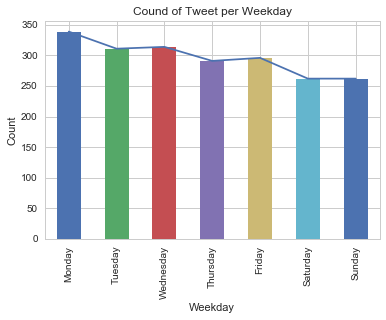

In [86]:
df['Weekday'] = pd.Categorical(df['Weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
Tweet_weekday = df['Weekday'].value_counts()
Tweet_weekday = Tweet_weekday.sort_index()

Tweet_weekday.plot()
plt.title('Cound of Tweet per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
Tweet_weekday.plot(kind="bar")

Text(0,0.5,u'Count')

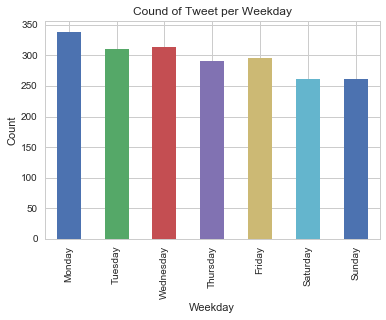

In [87]:
Tweet_weekday.plot(kind="bar")
plt.title('Cound of Tweet per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')

After spending an wonderfull weekend with our dogs, Mondays are known to be the most crucial weekday, leaving us to be tweeting our dog's images and thinking of our dogs while at work. Once the weekend hits again, as illustrated in the weekdatimeline, we can now spend the time with our beloved dogs again on staturday and sunday. :)   

#####  Gender Frequency count per Weekday

C:\Users\Alex-PC\Anaconda2\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


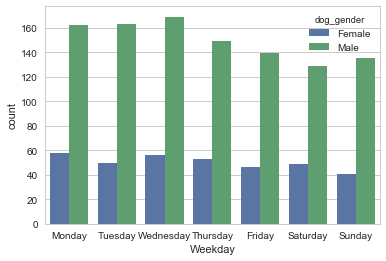

In [88]:
df2=df[df["dog_gender"]!="Unknown"]
sns.countplot(x="Weekday", hue="dog_gender",data=df2)




### Insight II

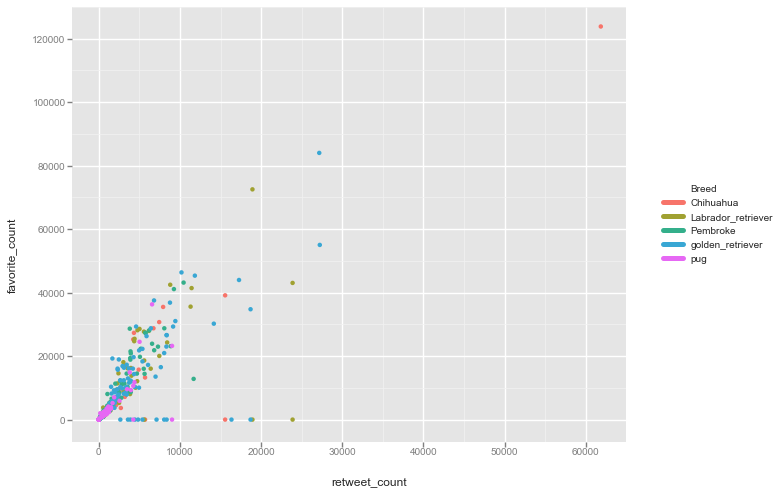

<ggplot: (28979793)>

In [89]:
top_breeds=df.groupby(['Breed']).filter(lambda x: len(x) >= 55)
ggplot(aes(x="retweet_count", y="favorite_count", color='Breed'),top_breeds) +geom_point() 

#df['Breed'].value_counts(1)

Chihuahua's are the most favorite and retweeted Breed, seconing golden retrivers , third labrador retrivers. 

### Insight III
##### Average Breed tweeted per Weekday

In [90]:
# Grouping 
df1=df.groupby(["Breed", "Weekday"]).size().reset_index(name="Count")
top_breeds=df.groupby(['Breed'])['Breed'].filter(lambda x: len(x) >= 55)

# Merging files
df_new=df1.merge(top_breeds.to_frame(), on='Breed', right_index=True)

#sorting by Catogories
df_new["Weekday"]=pd.Categorical(df_new['Weekday'], categories=['Monday','Tuesday'
                                                                ,'Wednesday','Thursday'
                                                                ,'Friday','Saturday', 'Sunday'],ordered=True)

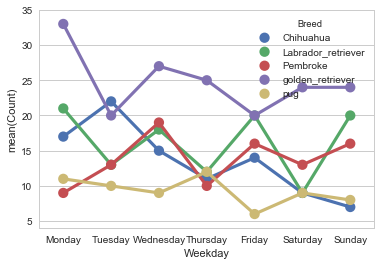

In [91]:
sns.pointplot(x="Weekday", y="Count", hue="Breed", data=df_new);

On average the most tweeted @weratedogs breed on tuesday's are chichuahuas, after golden retriever breed takes the leads throughtout the weekday. 

### Insight IV Dogs Gender Based on Top Breed

In [92]:
Group_week_gender=df.groupby(["Breed", "Weekday","dog_gender"]).size().reset_index(name="Count")
top_breeds=df.groupby(['Breed'])['Breed'].filter(lambda x: len(x) >= 55)

# Merging files
Top_breed_gender=Group_week_gender.merge(top_breeds.to_frame(), on='Breed', right_index=True)

#sorting by Catogories
Top_breed_gender["Weekday"]=pd.Categorical(Top_breed_gender['Weekday'], categories=['Monday','Tuesday'
                                                                ,'Wednesday','Thursday'
                                                                ,'Friday','Saturday', 'Sunday'],ordered=True)

Top_breed_gender=Top_breed_gender[Top_breed_gender['dog_gender']!="Unknown"]

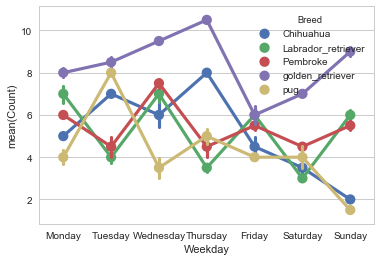

In [93]:
sns.pointplot(x="Weekday", y="Count", hue="Breed", data=Top_breed_gender);

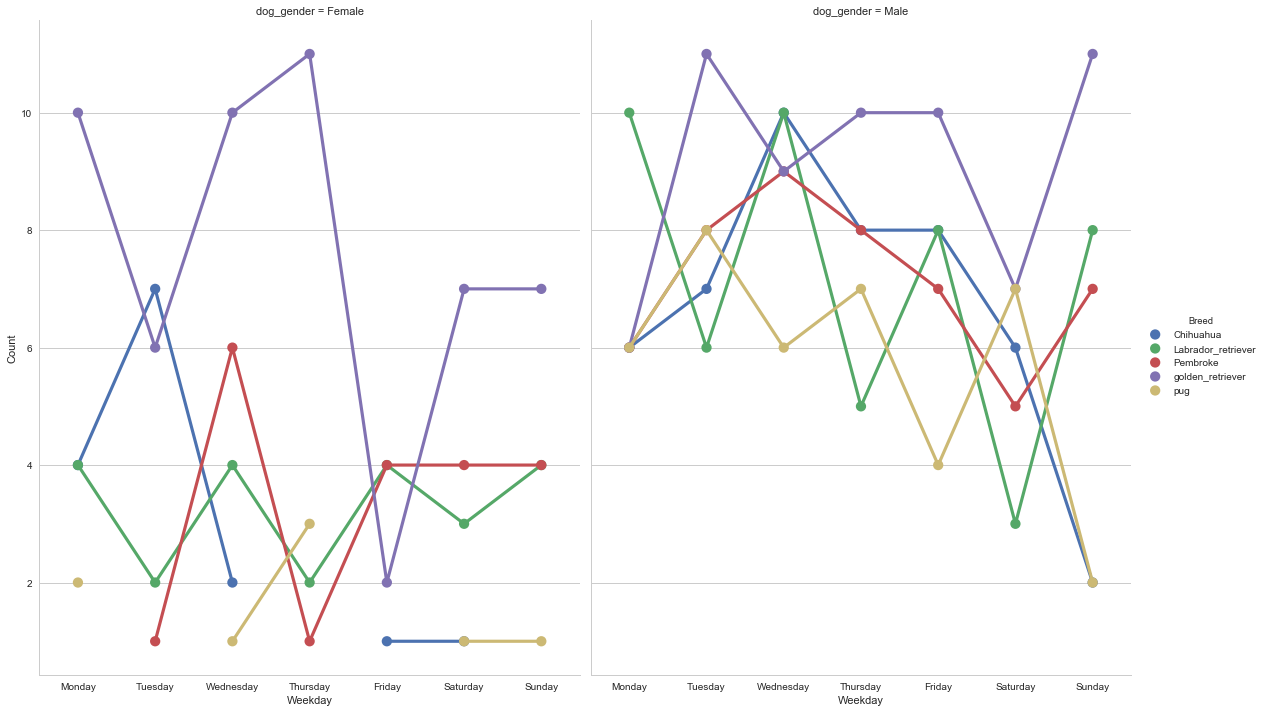

In [94]:
sns.factorplot(x="Weekday", y="Count" ,hue="Breed",col="dog_gender",
              data=Top_breed_gender, size=10, aspect=.8);

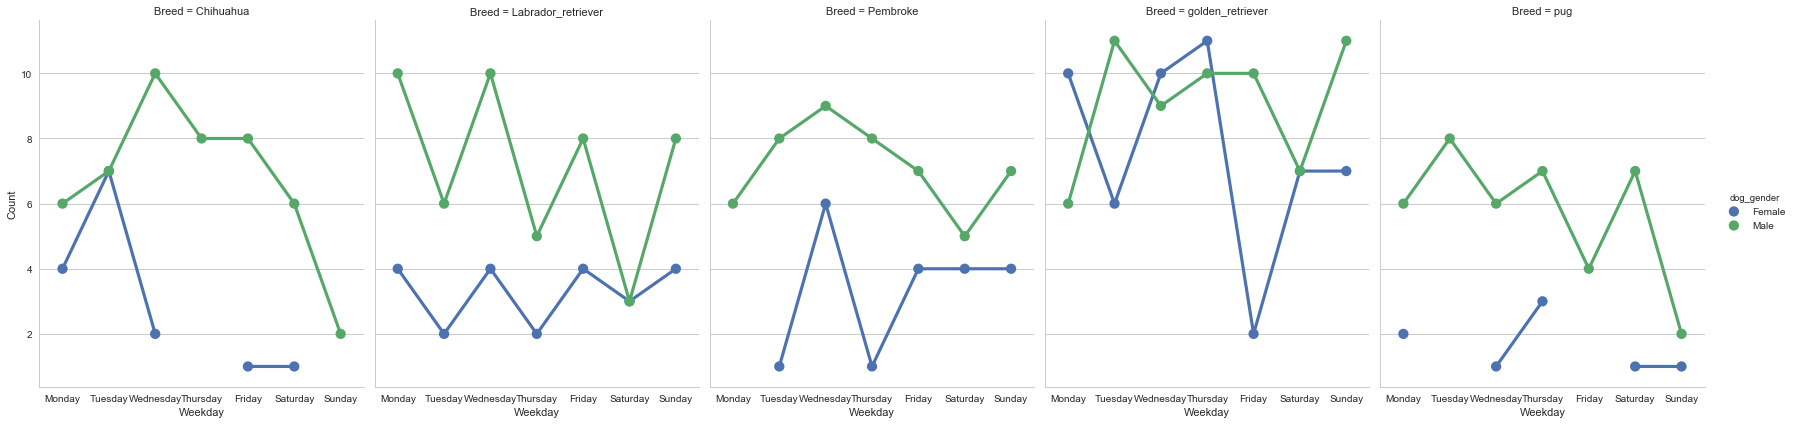

In [95]:
sns.factorplot(x="Weekday", y="Count" ,hue="dog_gender",col="Breed",
              data=Top_breed_gender, size=6, aspect=.8);

### Insight V Dog Stages

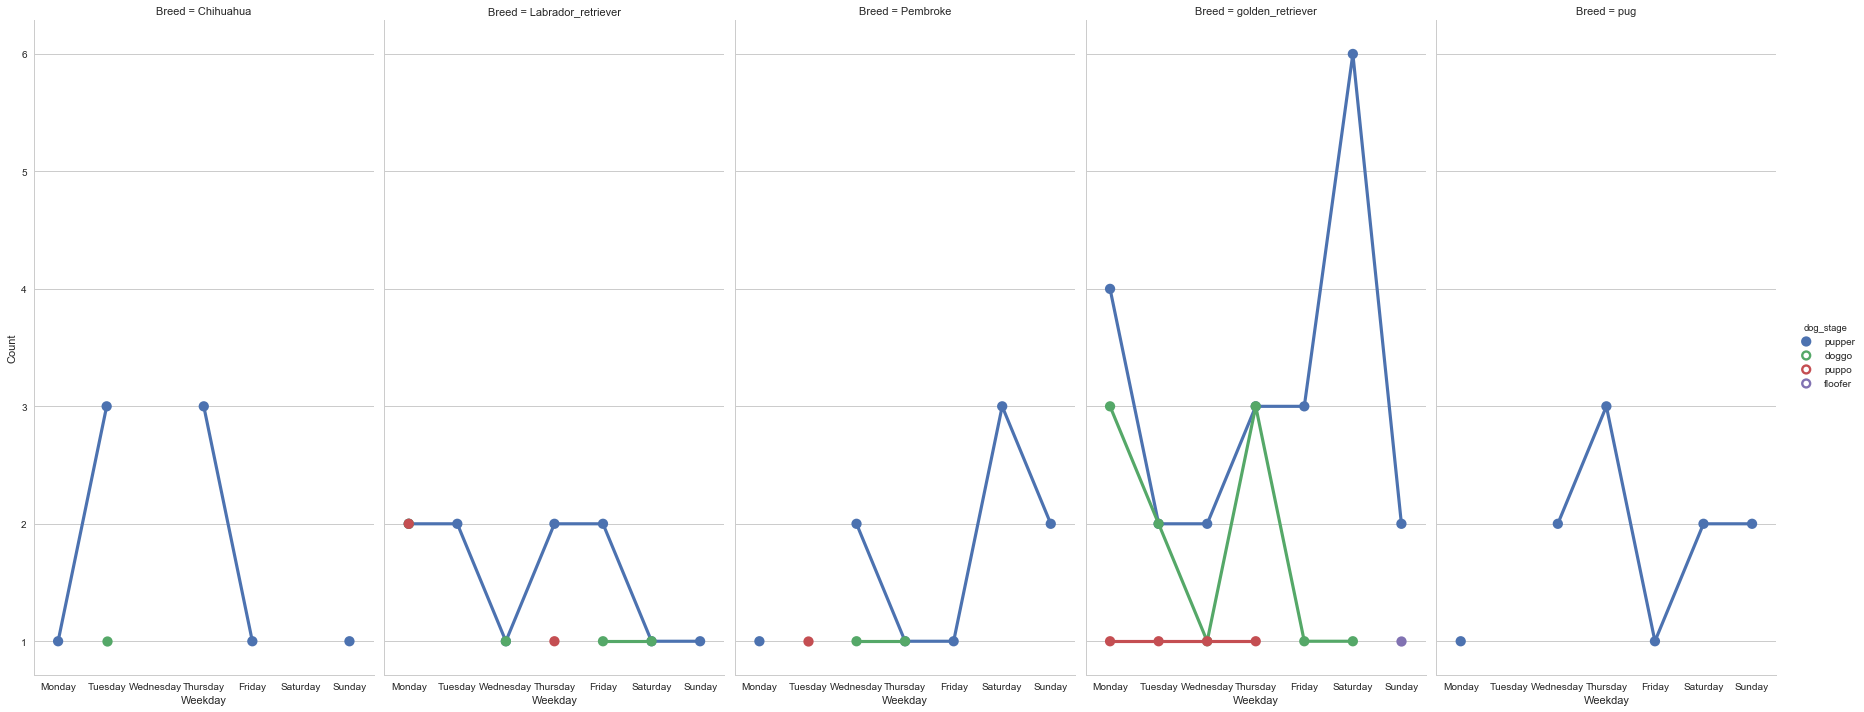

In [96]:
Group_week_stage=df.groupby(["Breed", "Weekday","dog_stage"]).size().reset_index(name="Count")
Group_week_stage=Group_week_stage[Group_week_stage["dog_stage"]!="None"]

top_breeds_Stage=df.groupby(['Breed'])['Breed'].filter(lambda x: len(x) >= 55)

# Merging files
Top_breed_stage=Group_week_stage.merge(top_breeds_Stage.to_frame(), on='Breed', right_index=True)

#sorting by Catogories
Top_breed_stage["Weekday"]=pd.Categorical(Top_breed_stage['Weekday'], categories=['Monday','Tuesday'
                                                                ,'Wednesday','Thursday'
                                                                ,'Friday','Saturday', 'Sunday'],ordered=True)
sns.factorplot(x="Weekday", y="Count" ,hue="dog_stage",col="Breed",
              data=Top_breed_stage, size=10, aspect=.5);

### Insight VI Dog stages Retweer and Favorite

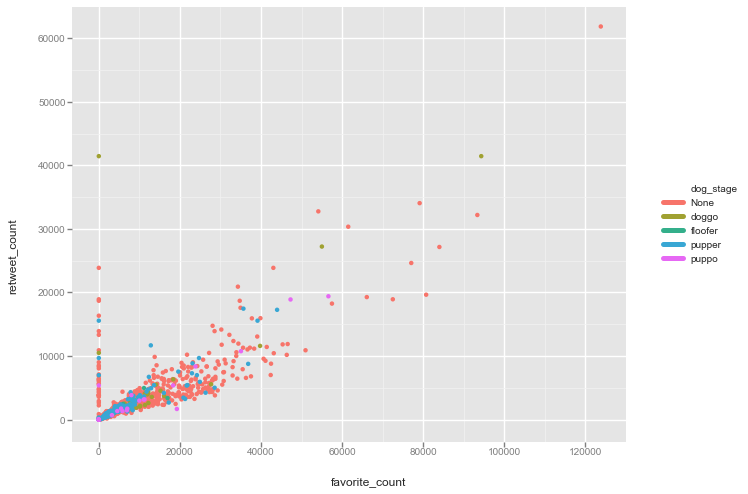

<ggplot: (29683562)>

In [97]:
ggplot(aes(x="favorite_count",y="retweet_count", color="dog_stage"), df) + geom_point()

### Insight VII Dog's Common name

Text(0,0.5,u"Dog's Name")

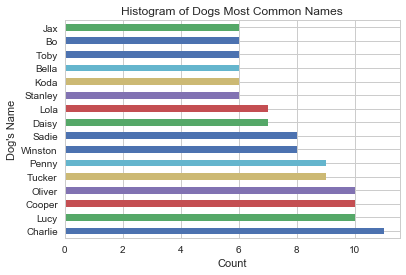

In [98]:
top_name=df[df["Names"]!="Dogwithnoname"]
top_name=top_name.groupby('Names').filter(lambda x: len(x) >= 6)
top_name["Names"].value_counts().plot(kind = 'barh')
plt.title('Histogram of Dogs Most Common Names')
plt.xlabel('Count')
plt.ylabel("Dog's Name")

#### Top 3 Common Dog Name based on Breed

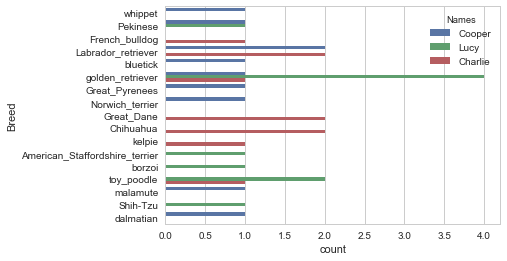

In [99]:
Name_breed=top_name[(top_name["Names"]=="Charlie") | (top_name["Names"]=="Lucy")| (top_name["Names"]=="Cooper")]
Name_breed.groupby(["Breed","Names"]).size().reset_index(name="Count").head()
sns.countplot(y="Breed", hue="Names", data=Name_breed)